Image Processing 1 - Instagram Filters

Student Info :

1400391  باسم حسام الدين بشير عباس     
BN:43752    
Mail:bassemhossam96@gmail.com

1.Documentation

-This Notebook contains the implementations of 5 Instagram Filters
(Lord Kelvin,1977,Gotham,Nashville,X-PRO II) using Lookup tables .

-The tables were obtained online, the filtered images were obtained by 
using the cv2.LUT function on each channel of the original rgb image with 
its corresponding  table and then merging the channels to form the filtered image


2.Script

In [106]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as matplotimg
import numpy as np

%matplotlib inline

filters = {'1977':{"r":[81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,82,82,83,83,83,84,84,86,86,87,87,88,88,89,89,90,90,92,93,93,94,94,95,95,96,97,97,99,100,101,102,102,103,103,104,105,107,108,109,110,111,112,113,114,115,117,117,118,119,120,122,123,124,125,126,127,129,130,131,132,133,134,134,136,137,138,139,140,141,143,144,145,146,147,148,149,151,152,153,154,155,156,157,158,159,159,160,161,162,163,165,166,167,167,168,169,171,172,173,174,174,176,177,178,180,180,181,182,184,185,185,187,188,190,190,191,193,194,195,196,198,198,200,201,202,203,204,206,206,207,209,209,210,211,212,213,214,215,216,216,217,218,219,219,219,219,220,221,222,222,222,222,222,223,223,224,224,224,224,225,225,225,225,225,225,225,225,225,225,225,225,226,226,226,226,226,226,226,226,226,226,226,226,226,226,226,226,226,226,226,226,226,226,226,226,226,226,226,226,226,226,226,226,226,226,226,226,226,226,225,225,225,225,225,225,225,225,225,225,225,225,225,225,225,225,224,224,224,224],"g":[58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,59,59,59,59,59,60,60,60,60,60,62,62,62,62,63,63,63,63,64,64,64,66,66,67,67,68,68,68,69,69,71,72,72,73,74,74,76,77,78,79,81,81,81,82,83,84,86,87,88,89,90,92,93,94,95,96,97,97,99,100,101,102,103,104,105,107,108,109,110,111,112,113,114,115,117,118,119,120,121,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,157,158,158,159,160,161,162,163,164,165,166,167,167,168,168,169,170,171,172,173,174,174,175,177,178,179,180,180,181,183,184,185,185,188,189,190,190,191,193,194,194,195,196,198,198,199,200,201,202,203,204,205,206,206,207,208,209,210,211,212,212,213,214,215,216,216,217,219,219,220,221,222,222,223,224,225,226,227,227,228,230,230,231,232,233,234,235,236,237,238,238,239,241,242,243,244,245,246,247,248,249,249,251,251,252,253,254,255],"b":[64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,66,66,66,66,66,67,67,67,68,68,68,68,69,69,69,71,71,72,72,73,73,74,74,74,76,77,77,78,79,81,82,82,83,84,86,86,87,88,89,90,92,93,94,96,97,99,100,101,102,103,105,105,107,108,109,110,111,112,114,115,117,118,119,120,122,123,124,125,126,127,129,130,131,132,132,133,135,136,137,138,140,141,142,143,145,146,147,149,150,151,153,154,155,157,157,159,160,161,163,164,166,167,168,169,170,172,173,174,175,176,177,179,180,180,182,183,184,185,186,187,188,189,190,190,192,193,194,194,195,196,197,198,198,199,201,201,202,202,203,204,205,206,206,206,207,208,209,209,209,210,210,211,212,212,212,212,212,213,213,214,214,214,214,215,215,215,215,215,215,215,215,215,215,215,215,215,215,215,215,215,215,215,215,215,214,214,214,214,214,214,214,213,213,213,213,213,213,212,212,212,212,212,212,212,212,212,212,212,212,212,212,212,212,213,213,213,213,213]},
           'Gotham':{'r':[0,0,0,1,1,1,1,1,1,1,2,2,2,2,2,3,3,3,4,4,4,5,5,5,6,6,7,7,7,8,8,9,9,10,10,11,11,12,12,12,13,13,14,14,15,15,16,16,17,17,18,18,19,19,20,20,21,21,22,22,23,23,24,25,25,25,26,26,27,27,28,28,29,29,30,30,31,32,32,33,33,34,34,35,35,36,36,37,38,38,39,39,40,41,41,42,42,43,44,44,45,45,46,47,47,48,48,49,50,50,51,52,52,53,54,54,55,56,57,58,58,59,60,61,62,63,64,65,66,67,68,70,71,73,74,76,77,79,80,82,83,84,86,87,88,90,91,92,94,95,96,98,99,100,102,103,104,106,107,109,110,111,113,114,116,118,119,121,123,124,126,128,129,131,133,135,137,138,140,142,144,146,148,149,151,153,155,156,158,160,162,163,165,167,168,170,172,173,175,176,178,180,181,183,184,186,187,189,191,192,194,195,197,198,200,201,203,204,205,207,208,210,211,213,214,215,217,218,219,221,222,223,224,225,227,228,229,230,231,233,234,235,237,238,239,241,242,244,245,246,248,249,251,252,254,255],'g':[0,0,0,0,0,1,1,1,1,1,1,1,1,1,2,2,2,2,2,3,3,3,4,4,4,4,5,5,5,5,6,6,6,7,7,7,8,8,8,9,9,9,10,10,10,11,11,12,12,12,13,13,14,14,14,15,15,16,16,17,17,18,18,19,19,20,20,21,21,22,22,23,23,24,24,25,26,26,27,28,28,29,30,30,31,32,32,33,34,35,35,36,37,38,39,39,40,41,42,43,44,45,46,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,67,68,69,70,71,72,73,74,75,77,78,79,81,82,83,84,86,87,88,90,91,92,93,95,96,97,99,100,101,102,104,105,106,108,109,110,112,113,115,116,118,119,121,122,124,125,127,128,130,132,133,135,137,138,140,142,143,145,147,149,150,152,154,155,157,159,160,162,163,165,167,168,170,171,173,174,176,177,179,180,182,183,185,186,188,189,191,192,194,195,196,198,199,201,202,204,205,206,208,209,211,212,213,215,216,217,219,220,221,223,224,225,226,228,229,230,232,233,234,236,237,239,240,242,243,245,246,248,249,251,252,254,255],'b':[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,2,2,2,3,3,4,4,4,5,5,6,6,7,7,8,9,9,10,10,11,12,12,13,13,14,15,15,16,17,17,18,19,20,20,21,22,22,23,24,24,25,26,27,27,28,29,30,31,32,33,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,58,59,60,61,62,63,64,66,67,68,69,70,71,73,74,75,76,77,78,79,81,82,83,84,85,86,87,88,89,90,91,92,93,94,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,131,132,133,134,135,136,137,138,139,140,140,141,142,143,144,145,146,148,149,150,151,152,153,155,156,157,158,160,161,162,164,165,166,168,169,171,172,173,175,176,178,179,181,182,184,186,187,189,190,192,194,195,197,199,201,202,204,206,208,210,212,214,216,218,220,222,224,226,228,230,232,234,235,237,239,241,243,244,246,248,250,251,253,255]},         
           'Nashville':{'r':[56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,57,57,58,58,59,59,60,61,62,63,64,65,66,67,68,69,71,72,73,75,76,78,79,81,82,84,85,87,88,90,91,93,95,96,98,100,102,104,106,108,110,113,115,117,120,122,124,127,129,131,133,136,138,140,142,144,146,148,150,152,154,155,157,159,160,162,164,165,167,168,170,171,173,174,175,177,178,179,181,182,183,185,186,187,189,190,191,192,194,195,196,197,198,200,201,202,203,204,205,206,208,209,209,210,211,212,213,214,215,216,217,217,218,219,220,220,221,222,223,223,224,225,226,226,227,228,228,229,230,230,231,231,232,233,233,234,234,235,235,236,237,237,238,238,239,239,240,240,240,241,241,242,242,243,243,243,244,244,245,245,245,246,246,246,247,247,247,248,248,248,248,249,249,249,249,250,250,250,250,251,251,251,251,251,252,252,252,252,252,253,253,253,253,253,254,254,254,254,254,254,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255],'g':[38,39,39,40,41,41,42,42,43,44,44,45,46,46,47,48,49,50,51,52,53,55,56,57,59,60,61,63,64,65,67,68,69,71,72,73,74,76,77,78,80,81,82,84,85,86,87,89,90,91,93,94,95,97,98,99,101,102,103,104,106,107,108,110,111,112,114,115,116,118,119,121,122,123,125,126,128,129,130,132,133,134,136,137,138,140,141,142,143,145,146,147,148,149,150,151,152,153,154,155,156,157,158,158,159,160,161,162,163,163,164,165,166,166,167,168,169,169,170,171,172,172,173,174,175,176,176,177,178,179,180,181,181,182,183,184,185,186,187,187,188,189,189,190,191,191,192,193,193,194,194,195,195,196,197,197,198,198,199,199,200,200,201,201,202,202,202,203,203,204,204,205,205,205,206,206,207,207,207,208,208,208,209,209,209,210,210,210,211,211,211,212,212,212,213,213,213,213,214,214,214,214,215,215,215,215,216,216,216,216,216,217,217,217,217,217,218,218,218,218,218,218,219,219,219,219,219,220,220,220,220,220,220,220,221,221,221,221,221,221,221,221,221,221,221,221,221,221,221,221,221,221,221,221,221,221],'b':[97,98,98,99,99,100,100,101,101,102,102,103,104,104,105,105,106,107,107,108,109,110,110,111,112,113,114,114,115,116,116,117,118,118,119,119,120,120,121,121,122,122,123,123,124,124,124,125,125,126,126,127,127,127,128,128,129,129,129,130,130,131,131,132,132,132,133,133,134,134,135,135,136,136,136,137,137,138,138,139,139,139,140,140,141,141,142,142,142,143,143,144,144,144,145,145,146,146,147,147,147,148,148,149,149,150,150,151,151,151,152,152,153,153,154,154,154,155,155,155,156,156,156,157,157,157,158,158,158,158,158,158,159,159,159,159,159,159,159,159,159,159,159,160,160,160,160,160,161,161,161,162,162,162,162,163,163,163,163,164,164,164,164,165,165,165,165,165,165,166,166,166,166,166,166,166,166,166,166,166,166,166,166,166,166,166,166,167,167,167,167,167,167,167,167,167,168,168,168,168,168,168,169,169,169,169,169,170,170,170,170,171,171,171,171,171,172,172,172,172,172,173,173,173,173,173,173,173,174,174,174,174,174,174,174,174,175,175,175,175,175,175,175,175,175,175,175,176,176,176,176,176,176,176,176,176]},
           'X-PRO II':{'r':[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,2,2,2,3,3,4,4,5,5,5,6,7,7,8,8,9,9,10,11,11,12,13,14,14,15,16,17,17,18,19,20,21,22,23,24,25,26,27,28,29,31,32,33,34,35,37,38,39,41,42,43,45,46,48,49,51,52,54,55,57,58,60,62,63,65,67,68,70,72,74,76,77,79,81,83,85,87,89,91,93,95,97,99,101,103,105,106,108,110,112,114,116,118,120,122,124,126,128,130,132,134,136,138,140,141,143,145,147,149,151,153,155,157,159,161,163,165,167,169,171,172,174,176,178,180,182,184,186,188,189,191,193,194,196,198,199,201,202,204,205,207,208,209,211,212,214,215,216,217,219,220,221,222,223,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,239,240,241,242,243,243,244,245,246,246,247,248,248,249,249,250,250,251,251,252,252,252,253,253,253,253,253,253,254,254,254,254,254,254,254,254,254,254,254,254,254,254,254,254,254,254,254,254,254,255,255,255,255,255,255,255],'g':[0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,3,3,3,4,4,4,5,5,5,6,6,7,7,8,8,9,10,10,11,12,12,13,14,14,15,16,17,18,18,19,20,21,22,23,24,25,26,27,28,29,30,31,33,34,35,36,37,39,40,41,43,44,45,47,48,50,51,53,54,56,57,59,61,62,64,66,67,69,71,73,75,76,78,80,82,84,86,88,90,92,94,96,98,100,102,104,106,108,110,112,114,116,118,120,122,124,126,128,130,132,134,136,138,140,142,144,146,148,150,152,154,156,158,160,161,163,165,167,169,171,173,175,176,178,180,182,183,185,187,189,190,192,193,195,197,198,200,201,203,204,206,207,209,210,211,213,214,216,217,218,219,221,222,223,224,226,227,228,229,230,231,232,233,234,235,236,237,237,238,239,240,240,241,242,243,243,244,244,245,246,246,247,247,248,248,249,249,250,250,250,251,251,252,252,252,253,253,253,253,253,253,254,254,254,254,254,254,254,254,254,254,254,254,254,254,254,255,255,255,255,255,255,255,255,255],'b':[24,25,26,27,28,28,29,30,31,32,33,34,35,35,36,37,38,39,40,41,41,42,43,44,45,45,46,47,48,49,49,50,51,52,53,53,54,55,56,56,57,58,59,59,60,61,62,62,63,64,64,65,66,67,67,68,69,70,70,71,72,73,73,74,75,76,77,77,78,79,80,81,81,82,83,84,85,86,86,87,88,89,90,91,91,92,93,94,95,96,96,97,98,99,100,101,101,102,103,104,105,106,107,107,108,109,110,111,112,113,114,114,115,116,117,118,119,119,120,121,122,123,124,124,125,126,127,127,128,129,129,130,130,131,131,132,132,133,134,134,135,136,137,138,138,139,140,141,142,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,162,163,164,165,165,166,167,168,168,169,170,171,171,172,173,173,174,175,176,176,177,178,178,179,180,181,182,182,183,184,185,185,186,187,188,189,189,190,191,192,193,193,194,195,196,197,197,198,199,200,200,201,202,203,204,204,205,206,206,207,208,208,209,210,210,211,212,212,213,214,215,215,216,217,218,218,219,220,221,221,222,223,224,225,226,226,227,228]},
           'Lord Kelvin':{'r':[43,44,46,47,49,50,52,53,55,56,58,59,61,62,64,65,67,69,70,72,73,75,77,78,80,81,83,85,86,88,90,91,93,95,96,98,100,102,103,105,107,109,111,112,114,116,118,120,121,123,125,127,129,130,132,134,136,137,139,141,142,144,146,147,149,151,152,154,155,157,158,160,162,163,165,166,168,169,171,172,174,175,176,178,179,180,182,183,184,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,201,202,203,204,204,205,206,207,207,208,209,210,210,211,212,212,213,214,214,215,216,217,217,218,219,219,220,221,222,222,223,224,224,225,225,226,227,227,228,228,229,229,229,230,230,231,231,232,232,232,233,233,233,234,234,235,235,235,236,236,236,237,237,237,238,238,239,239,239,240,240,240,241,241,241,242,242,242,243,243,243,243,244,244,244,245,245,245,245,245,246,246,246,246,246,247,247,247,247,247,248,248,248,248,248,248,249,249,249,249,249,249,249,250,250,250,250,250,250,250,250,251,251,251,251,251,251,251,251,251,252,252,252,252,252,252,252,252,252,253,253,253,253,253,253,253,253,254,254,254,254],'g':[36,36,36,36,36,36,36,36,36,36,36,36,36,37,37,37,37,37,37,38,38,38,39,39,40,40,41,41,42,43,43,44,45,46,47,47,48,49,50,51,52,53,54,55,56,57,59,60,61,62,63,64,65,67,68,69,70,71,72,73,75,76,77,78,79,80,81,82,83,84,86,87,88,89,90,91,92,93,95,96,97,98,99,100,101,102,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,155,156,157,158,158,159,160,160,161,161,162,163,163,164,164,165,165,166,166,167,167,168,168,168,169,169,170,171,171,172,172,173,173,174,174,175,175,176,177,177,178,178,179,179,180,180,181,181,182,182,182,183,183,184,184,184,185,185,185,186,186,186,186,187,187,187,187,188,188,188,188,188,189,189,189,189,189,190,190,190,190,190,190,190,191,191,191,191,191,191,191,191,192,192,192,192,192,192,192,192,193,193,193,193,193,193,193,193,194,194,194,194,194,194,194,195,195,195],'b':[69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,70,70,70,70,70,70,70,70,70,70,71,71,71,72,72,73,73,73,74,74,75,75,76,76,77,78,78,79,79,80,80,81,81,82,82,82,83,83,84,84,84,85,85,86,86,86,87,87,87,88,88,88,89,89,90,90,90,91,91,91,92,92,93,93,93,94,94,95,95,96,96,96,97,97,98,99,99,100,100,101,101,102,102,102,103,103,103,104,104,104,105,105,105,106,106,106,106,107,107,107,107,108,108,108,108,109,109,109,110,110,110,111,111,111,111,112,112,112,113,113,113,114,114,114,115,115,115,115,116,116,116,116,117,117,117,117,117,118,118,118,118,118,118,119,119,119,119,119,119,119,120,120,120,120,120,120,120,120,120,121,121,121,121,121,121,121,121,121,121,121,122,122,122,122,122,122,122,122,122,122,122,122,123,123,123,123,123,123,123,123,123,123,123,124,124,124,124,124]},
           
           }

    
def insta_like(img, instafilter):
    
    blue, green, red = cv2.split(img)
    blue=cv2.LUT(blue,np.array(filters[instafilter]['b']))
    green=cv2.LUT(green,np.array(filters[instafilter]['g']))
    red=cv2.LUT(red,np.array(filters[instafilter]['r']))
    red = np.clip(red,0,255).astype(np.uint8)
    green = np.clip(green,0,255).astype(np.uint8)
    blue = np.clip(blue,0,255).astype(np.uint8)
    return_image = cv2.merge((blue,green, red))

    return return_image


2.0 Input Image

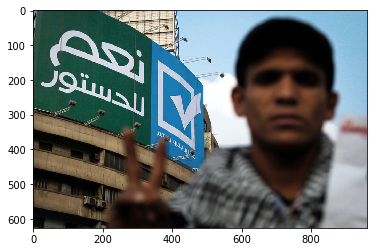

In [91]:
img = cv2.imread('1220133117842.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

2.1 Lord Kelvin Filter

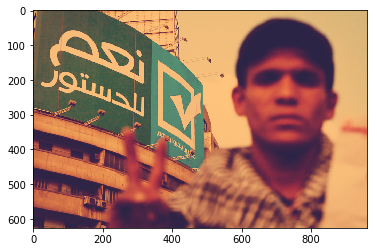

In [107]:
my_Kelvin = insta_like(img, 'Lord Kelvin')
plt.imshow(cv2.cvtColor(my_Kelvin, cv2.COLOR_BGR2RGB))
plt.show()

2.2 1977 Filter

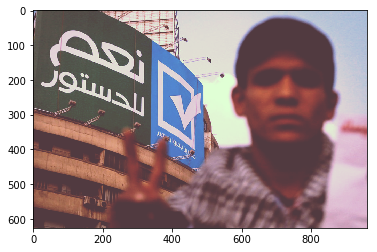

In [108]:
my_1977 = insta_like(img, '1977')
plt.imshow(cv2.cvtColor(my_1977, cv2.COLOR_BGR2RGB))
plt.show()

2.3 Gotham Filter

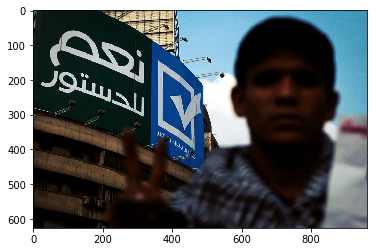

In [109]:
my_Gotham = insta_like(img, 'Gotham')
plt.imshow(cv2.cvtColor(my_Gotham, cv2.COLOR_BGR2RGB))
plt.show()

2.4 Nashville Filter

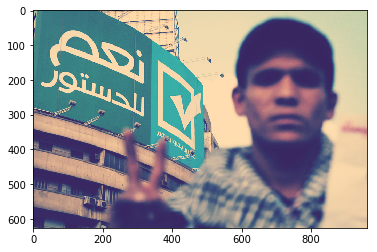

In [110]:
my_Nashville = insta_like(img, 'Nashville')
plt.imshow(cv2.cvtColor(my_Nashville, cv2.COLOR_BGR2RGB))
plt.show()

2.5 X-PRO II Filter

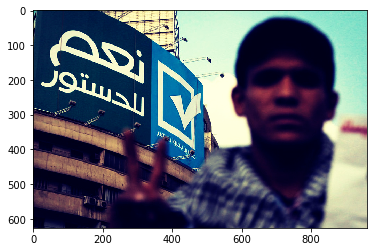

In [112]:
my_XPRO= insta_like(img, 'X-PRO II')
plt.imshow(cv2.cvtColor(my_XPRO, cv2.COLOR_BGR2RGB))
plt.show()